In [62]:
import hdbscan
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import wasserstein_distance, binned_statistic
from sklearn.cluster import DBSCAN


In [34]:
X = np.array([np.array([1, 2]), np.array([2, 3, 4]), np.array([6, 5]), np.array([8, 8, 9, 10])], dtype=object)

def pairwise_distance(X, metric):
    distances = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            distances[i, j] = metric(X[i], X[j])
    return distances

# Compute custom distance matrix
distances = pairwise_distance(X, wasserstein_distance)

print("Distance matrix", distances)
# Perform HDBSCAN clustering using the custom distance matrix
clusterer = hdbscan.HDBSCAN(metric='precomputed')
labels = clusterer.fit_predict(distances)
print("HDBSCAN labels:", labels)

# Perform HDBSCAN clustering using the custom distance matrix
dbscan = DBSCAN(metric='precomputed')
labels = dbscan.fit_predict(distances)
print("DBSCAN labels:", labels)

Distance matrix [[0.   1.5  4.   7.25]
 [1.5  0.   2.5  5.75]
 [4.   2.5  0.   3.25]
 [7.25 5.75 3.25 0.  ]]
Labels: [-1 -1 -1 -1]
Labels: [-1 -1 -1 -1]


/var/folders/zw/rd0tg2h150zbg_ps7wgtzpgh0000gp/T/ipykernel_53057/255596829.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='ward')


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 3.0, 3.0, 0.0],
  [0.0, 6.5, 6.5, 0.0],
  [3.0, 11.096170510586074, 11.096170510586074, 6.5]],
 'ivl': ['0', '1', '2', '3'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

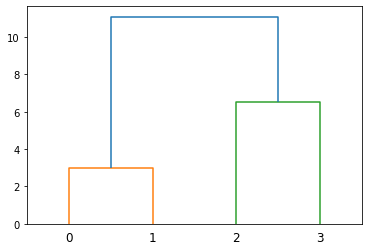

In [36]:
# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Plot dendrogram
dendrogram(Z)

## Use on data

In [44]:
# Project path
import sys
import os
ppath = sys.path[0] + '/../'
sys.path.append(os.path.join(ppath, 'code'))
from discretizers import *

/Users/eylai/anaconda3/envs/lucid/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/eylai/anaconda3/envs/lucid/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


(CVXPY) Oct 07 05:55:28 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Oct 07 05:55:28 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [45]:
df = pd.read_csv(os.path.join(ppath, 'data', 'uciml_pima-indians-diabetes-database', 'diabetes.csv'))
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
age = list(df['Age'])
#age = age + [np.nan]
N = len(age)
bins0 = [0, 19, 45, 65, 85, 100]
bins1 = [0, 10, 20, 35, 40, 50, 60, 70, 80, 90, 100]
#bins1 = [0, 50, 60, 70, 80, 90]
bins2 = [0, 20, 40, 60, 80, 100]
bins3 = [0, 18, 45, 60, 80, 100]
binning = [bins0, bins1, bins2, bins3]

In [54]:
ls = []
for bins in binning:
    hist, bin_edges = np.histogram(age, bins=bins)
    distribution = hist / N
    print(distribution)

    medians, _, _ = binned_statistic(age, age, bins=bins, statistic='median')
    medians[np.isnan(medians)] = 0
    ls.append((medians, distribution))

print("====================================")
X = np.array([ls[i][1] for i in range(len(ls))], dtype=object)
X

[0.         0.82574772 0.15214564 0.02080624 0.        ]
[0.         0.         0.63459038 0.09492848 0.15344603 0.07412224
 0.03771131 0.00260078 0.00130039 0.        ]
[0.         0.72951886 0.22756827 0.04031209 0.00130039]
[0.         0.82574772 0.1313394  0.04031209 0.00130039]


array([array([0.        , 0.82574772, 0.15214564, 0.02080624, 0.        ]),
       array([0.        , 0.        , 0.63459038, 0.09492848, 0.15344603,
              0.07412224, 0.03771131, 0.00260078, 0.00130039, 0.        ]),
       array([0.        , 0.72951886, 0.22756827, 0.04031209, 0.00130039]),
       array([0.        , 0.82574772, 0.1313394 , 0.04031209, 0.00130039])],
      dtype=object)

In [55]:
# Compute custom distance matrix
distances = pairwise_distance(X, wasserstein_distance)

print("Distance matrix", distances)
# Perform HDBSCAN clustering using the custom distance matrix
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)
labels = clusterer.fit_predict(distances)
print("HDBSCAN labels:", labels)

# Perform HDBSCAN clustering using the custom distance matrix
dbscan = DBSCAN(metric='precomputed')
labels = dbscan.fit_predict(distances)
print("DBSCAN labels:", labels)

Distance matrix [[0.         0.10351105 0.03849155 0.0083225 ]
 [0.10351105 0.         0.09986996 0.09986996]
 [0.03849155 0.09986996 0.         0.03849155]
 [0.0083225  0.09986996 0.03849155 0.        ]]
HDBSCAN labels: [-1 -1 -1 -1]
DBSCAN labels: [-1 -1 -1 -1]


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.012320124090847349, 0.012320124090847349, 0.0],
  [0.0, 0.07157329563188304, 0.07157329563188304, 0.012320124090847349],
  [0.0, 0.21407839251909383, 0.21407839251909383, 0.07157329563188304]],
 'ivl': ['1', '2', '0', '3'],
 'leaves': [1, 2, 0, 3],
 'color_list': ['C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1']}

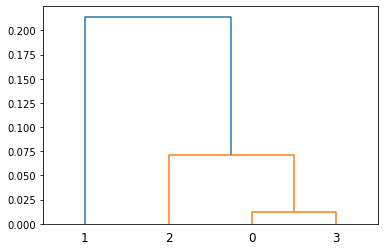

In [57]:
# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Plot dendrogram
dendrogram(Z)

'leaves': index in X  
'leaves_color_list': labels

In [69]:
fcluster(Z, 2, criterion='maxclust')

array([1, 2, 1, 1], dtype=int32)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.012320124090847349, 0.012320124090847349, 0.0],
  [0.0, 0.07157329563188304, 0.07157329563188304, 0.012320124090847349],
  [0.0, 0.21407839251909383, 0.21407839251909383, 0.07157329563188304]],
 'ivl': ['1', '2', '0', '3'],
 'leaves': [1, 2, 0, 3],
 'color_list': ['C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1']}

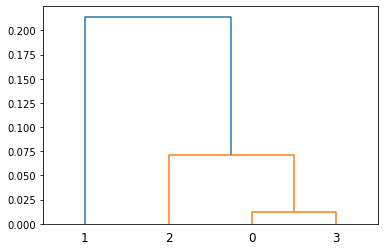

In [61]:
dendrogram(Z)